# Team Members:

### 1. Rubanraj RaviChandran
### 2. Ramesh Kumar
### 3. Ravikiran Bhat

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import Image
from IPython import display
%matplotlib inline
from tsp_solver.greedy import solve_tsp

# Exercise 1
Show that in the SOM algorithm the winner neuron for an input x is that neuron k whose weight
vector wk maximizes the inner product < wk; x > of x and wk, take x and wk as normalized.

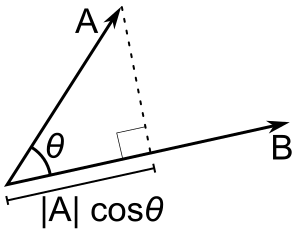

In [6]:
Image(filename ='../ravi/1.png')


Then the inner product or dot product of these 2 vectors is equivalent to : $$ \textbf{A}.\textbf{B} = ||\textbf{A}||\ ||\textbf{B}||\ cos(\theta)$$. Maximising this inner product implies $cos(\theta) = 1$ or $\theta = 0$. In other words, the euclidean distance between the 2 vectors is minimised. Since we need to minimize the distance between a winning neuron and the input vector, hence the inner product $\textit{< wk; x > }$ needs to be maximised

# Exercise 2

In [7]:
class SOM:
    def __init__(self,input_,num_of_nodes,eta,initial_wts,threshold):
        self.input_ = input_
        self.num_of_nodes = num_of_nodes
        self.eta = eta
        self.current_wts = initial_wts
        self.t2 = 1000
        self.threshold = threshold
    
    def euclidean_distance_1d(self,x,y):
        return abs(x - y)
    
    def get_winning_neuron(self,x,W):
        winner = min([(self.euclidean_distance_1d(x,w), index) for index,w in enumerate(W)])[1]
        return winner
    
    def d_ij(self,winner):
        distance = [self.euclidean_distance_1d(self.current_wts[winner],\
                                               self.current_wts[i])\
                    for i in range(len(self.current_wts))]
        return distance
    
    def gaussian(self,sigma,distance):
        h = [np.exp(-(d**2)/(2*sigma**2)) for d in distance]
        return h
    
    def compute_width(self,initial_sigma,n,t1):
        return initial_sigma*np.exp(-n/t1)
    
    def weight_adaptation(self,current_wt,eta,h,x):
        new_wts = [(w + (eta*h*(x-w))) for w in current_wt]
        return new_wts
    
    def exponential_decay_update(self,initial_eta,n,t2):
        return initial_eta*np.exp(-n/t2)
    
    def compute_t1(self,t2):
        sigma=2
        return t2/np.log(sigma)
    
    def stopping_criteria(self,w_old,w_new):
        result = 0
        for i,w in enumerate(w_old):
            result += abs(w - w_new[i])
            
        if (result < self.threshold):
            print "Stopping criteria check:sum(w_old - w_new) : " \
            +str(result)+"< "+str(self.threshold)+". Iteration end for current input"
            return True
        else:
            print "Stopping criteria check :sum(w_old - w_new)  : " \
            +str(result)+"> "+str(self.threshold)
            return False
    
    def train(self):
        sigma = 2
        t1 = self.compute_t1(self.t2)
        n = 1
        for x in self.input_:
            while(True):
                win_idx = self.get_winning_neuron(x,self.current_wts)                
                print "\nWinner neuron index : "+str(win_idx)+", weight :"+str(self.current_wts[win_idx])
                lateral_dist = self.d_ij(win_idx)
                h = self.gaussian(sigma,lateral_dist)
                updates_wts = self.weight_adaptation(self.current_wts,self.eta,h[win_idx],x)
                print "Updated weights :",updates_wts
                if not self.stopping_criteria(self.current_wts,updates_wts):
                    self.current_wts =  np.array(updates_wts)
                    self.eta = self.exponential_decay_update(self.eta,n,self.t2)
                    n += 1 
                else:
                    break
        print "\nFinal adjusted weights :",self.current_wts

In [8]:
initial_wts = np.array([[0.15,0.45],
                        [0.3,0.9]])
inputs = [0.1,0.2,0.4,0.5]

In [9]:
"""
Initial weights : [0.15 , 0.45]
"""
som = SOM(inputs,2,0.1,initial_wts[0],0.01)
som.train()


Winner neuron index : 0, weight :0.15
Updated weights : [0.14499999999999999, 0.41500000000000004]
Stopping criteria check :sum(w_old - w_new)  : 0.04> 0.01

Winner neuron index : 0, weight :0.145
Updated weights : [0.1433445425147285, 0.40341179760309959]
Stopping criteria check :sum(w_old - w_new)  : 0.0132436598822> 0.01

Winner neuron index : 0, weight :0.143344542515
Updated weights : [0.14275793792092928, 0.39930556544650508]
Stopping criteria check:sum(w_old - w_new) : 0.00469283675039< 0.01. Iteration end for current input

Winner neuron index : 0, weight :0.143344542515
Updated weights : [0.1441112907532954, 0.40065891827887118]
Stopping criteria check:sum(w_old - w_new) : 0.0035196275628< 0.01. Iteration end for current input

Winner neuron index : 1, weight :0.403411797603
Updated weights : [0.14681799641802767, 0.40336562394360342]
Stopping criteria check:sum(w_old - w_new) : 0.0035196275628< 0.01. Iteration end for current input

Winner neuron index : 1, weight :0.4034117

In [10]:
"""
Initial weights : [0.3,0.9]
"""
som = SOM(inputs,2,0.1,initial_wts[1],0.01)
som.train()


Winner neuron index : 0, weight :0.3
Updated weights : [0.27999999999999997, 0.82000000000000006]
Stopping criteria check :sum(w_old - w_new)  : 0.1> 0.01

Winner neuron index : 0, weight :0.28
Updated weights : [0.27337817005891402, 0.79351268023565624]
Stopping criteria check :sum(w_old - w_new)  : 0.0331091497054> 0.01

Winner neuron index : 0, weight :0.273378170059
Updated weights : [0.27103175168371713, 0.78412700673486879]
Stopping criteria check :sum(w_old - w_new)  : 0.011732091876> 0.01

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27018023473230185, 0.78072093892920769]
Stopping criteria check:sum(w_old - w_new) : 0.00425758475708< 0.01. Iteration end for current input

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27067810541598047, 0.78121880961288637]
Stopping criteria check:sum(w_old - w_new) : 0.00326184338972< 0.01. Iteration end for current input

Winner neuron index : 0, weight :0.271031751684
Updated weights : [0.27167

Results show that when starting from initial weights [0.15, 0.45], the network converges (i.e, the stopping criteria is satisfied) in a smaller number of iterations compared to when we start with the initial weights of [0.3, 0.9]. Furthermore, when using initial weights of [0.3, 0.9], the neuron with the initial weight 0.3 is selected as the winning neuron at every iteration.

# Exercise 3

In [13]:
class TravellingSalesMan:
    def __init__(self,_no_of_neurons,
                 _no_of_cities,
                 _lattice_radius,
                 _lattice_center,
                 _eta,
                 _no_epochs):
        
        self.no_of_neurons = _no_of_neurons
        self.no_of_cities = _no_of_cities
        self.lattice_radius = _lattice_radius
        self.lattice_center = _lattice_center
        self.eta = _eta
        self.no_of_epochs = _no_epochs
        
        self.current_weights = self.points_in_circle()
        print "Initial coordinates of neurons"
        print self.current_weights
        
        self.cities = self.get_cities()
        print "Initial coordinates of cities"
        print self.cities
        
        self.sigma = (self.lattice_radius * 2) + 5
        self.t_one = self.no_of_epochs/np.log(self.sigma)
        
        #city labels
        self.city_labels = ['wismar','schwerin','rostock',
                           'stralsund','greifswald',
                           'neubrandenberg']
    
    '''
    find euclidean distance between two coordinates
    '''
    def euclidean_distance_2d(self,x, y):
        return math.sqrt(pow(y[0]-x[0],2) + pow(y[1]-x[1],2))
    
    '''
    find euclidean distance between given input 
    and all neurons weight, and return winning neuron 
    with shortest distance 
    '''
    def get_winner(self,x):
        return min([(self.euclidean_distance_2d(x,w),index) 
                   for index,w in enumerate(self.current_weights)])[1]
    
    '''
    return city coordinates
    '''
    def get_cities(self):
        return np.array([[1.3,5.7],
                         [30.7,98.3],
                         [95.3,69.3],
                         [37.3,22.5],
                         [85.5,12.5],
                         [46.6,63.6]])
    
    def compute_distance_for_TspSolve(self):

        a = self.get_cities()
        dist = np.zeros((0,a.shape[0]))
        for i in range(a.shape[0]):
            euclidean = []
            for j in a:
                euclidean.append(tsm.euclidean_distance_2d(a[i],j))
            dist = np.vstack((dist, np.hstack((euclidean))))
        return dist
    
    '''
    plot cities and neuron locations
    '''
    def plot_cities(self,epoch):
        
        #getting x,y coordinates of cities
        cities_x = self.cities[:,0:1]
        cities_y = self.cities[:,1:2]
        
        #configuration for plot
        fig, ax = plt.subplots()
        plt.xlim([1,120])
        plt.ylim([1,120])
        fig.set_figheight(9)
        fig.set_figwidth(15)
        plt.title("Sigma = " + str(self.sigma)+ \
                  ", Learning rate = " + str(self.eta) + \
                  ", Current epoch = " + str(epoch))
        plt.xlabel("x-coordinates of cities and neuron weights")
        plt.ylabel("y-coordinates of cities and neuron weights")
        
       
        #plot cities
        ax.plot(cities_x, cities_y,'ro')
        
        #plot neurons 
        if epoch is 0:
            ax.add_patch(plt.Circle(self.lattice_center, 
                                    radius=self.lattice_radius, 
                                    color='g', 
                                    fill=False))
            
        #plot connections between neurons
        if epoch is not 0:
            ax.plot(self.current_weights[:,0:1],
                    self.current_weights[:,1:2],
                    marker='o', linestyle='--',
                    color='b')
        else:
            ax.plot(self.current_weights[:,0:1],
                    self.current_weights[:,1:2],'bo') 
        
        #showing name of the cities in the plot
        for i, label in enumerate(self.city_labels):
            ax.annotate(label, (cities_x[i]+1,cities_y[i]+1))
            
        #showing name of the neurons in the plot
#         print current_weights
        for index, weight in enumerate(self.current_weights):
            ax.annotate(index, (weight[0]+0.5,weight[1]+1.5))
        
        
    '''
    generate points in circle lattice structure
    '''    
    def points_in_circle(self):
        points = np.empty((0,2))
        circle_center = self.lattice_center
        radius = self.lattice_radius
        n = self.no_of_neurons
        for x in xrange(0,n):
            point = [circle_center[0]+np.cos(2*np.pi/n*x)*radius,
                     circle_center[1]+np.sin(2*np.pi/n*x)*radius]
            points = np.vstack([points,point])
        return points   
    
    '''
    update weight function
    '''
    def weight_adaptation(self,neuron,winner_neuron,x):
        current_weight = self.current_weights[neuron]
        h_ij = self.calculate_H_i_j(neuron,winner_neuron)
        new_weight = (current_weight + (self.eta*(h_ij)*(x-current_weight)))
        self.current_weights[neuron] = new_weight
        return True
    
    '''
    update learning rate funtion
    '''
    def eta_update(self,n):
        self.eta = self.eta*np.exp(-n/1000000000.0)
        
    '''
    calcuate H_ij function
    '''
    def calculate_H_i_j(self,current_neuron,winner_neuron):
        distance = self.euclidean_distance_2d(self.current_weights[winner_neuron],
                                             self.current_weights[current_neuron])
        return np.exp(-(distance**2)/(2*(self.sigma**2)))
    
    '''
    sigma updation function
    '''
    def sigma_update(self,n):
        self.sigma = self.sigma * np.exp(-(n/1000000000.0))
        
    
    '''
    get neighbors of winning neuron
    '''
    def get_neighors(self,winner):
        neuron_positions = range(self.current_weights.shape[0])
        if winner is len(neuron_positions)-1:
            return [neuron_positions[winner],
                    neuron_positions[winner-1],
                    neuron_positions[0]]
        else:
            return [neuron_positions[winner],
                    neuron_positions[winner-1],
                    neuron_positions[winner+1]]
        
    
    '''
    sort the visit order
    '''
    def find_visit_order(self):
        order = []
        for city in self.cities:
            order.append(self.get_winner(city))
            
        self.sorted_order = []
        
        for i in range(len(order)):
            self.sorted_order.append(order.index(i))
        
        self.city_order = []
        for index in self.sorted_order:
            self.city_order.append(self.city_labels[index])
            
        return self.sorted_order
    
    '''
    calculate the distance to visit
    '''
    def calculate_total_path(self,order):
        distance = 0
        
        for index in range(len(order)-1):
            distance += self.euclidean_distance_2d(self.cities[order[index]],
                                             self.cities[order[index+1]])
        distance += self.euclidean_distance_2d(self.cities[order[0]],
                                              self.cities[order[-1]])
        self.total_distance = distance
        return self.total_distance
                
    '''
    training function
    '''
    def train(self):
        for epoch in range(self.no_of_epochs):
            for city in self.cities: 
                winner_neuron = self.get_winner(city)
                winner_with_neighbors = self.get_neighors(winner_neuron)
                for neuron in winner_with_neighbors:
                    self.weight_adaptation(neuron,winner_neuron,city)
                self.eta_update(epoch)
            if epoch % 3000 is 0:
                self.plot_cities(epoch+3000)
            self.sigma_update(epoch)
            
        print self.calculate_total_path(self.find_visit_order())

Initial coordinates of neurons
[[ 58.          52.        ]
 [ 55.          57.19615242]
 [ 49.          57.19615242]
 [ 46.          52.        ]
 [ 49.          46.80384758]
 [ 55.          46.80384758]]
Initial coordinates of cities
[[  1.3   5.7]
 [ 30.7  98.3]
 [ 95.3  69.3]
 [ 37.3  22.5]
 [ 85.5  12.5]
 [ 46.6  63.6]]
345.129019896


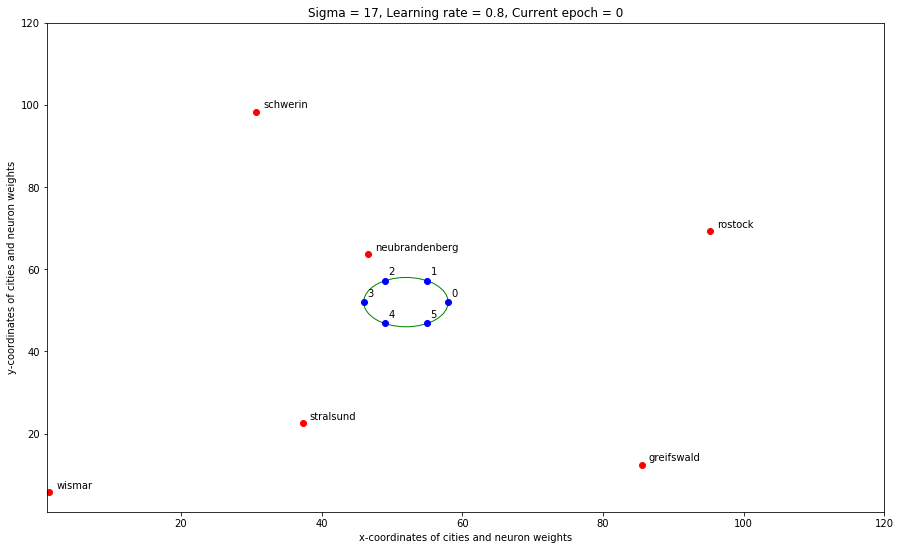

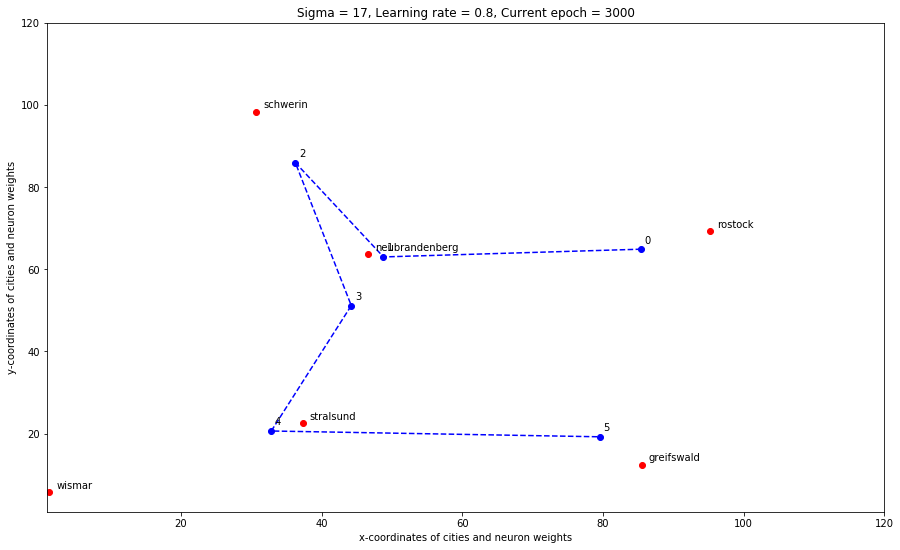

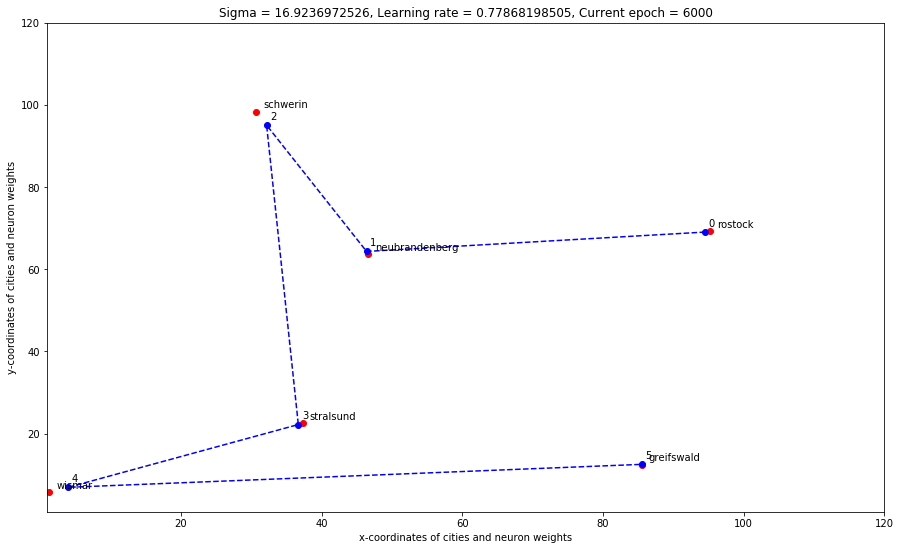

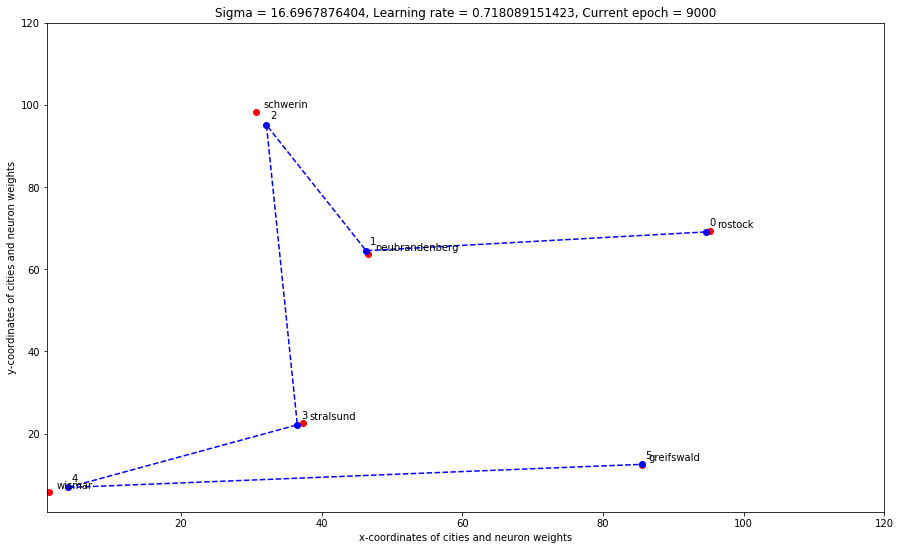

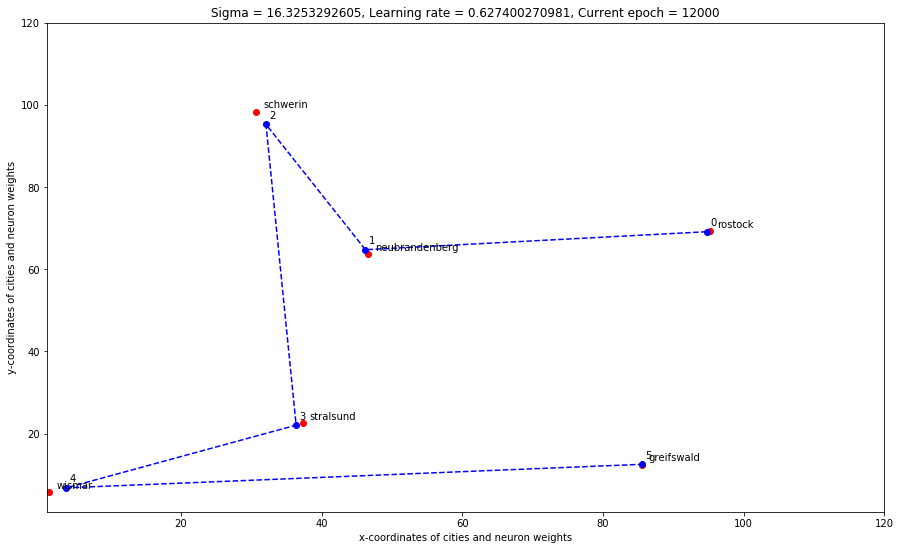

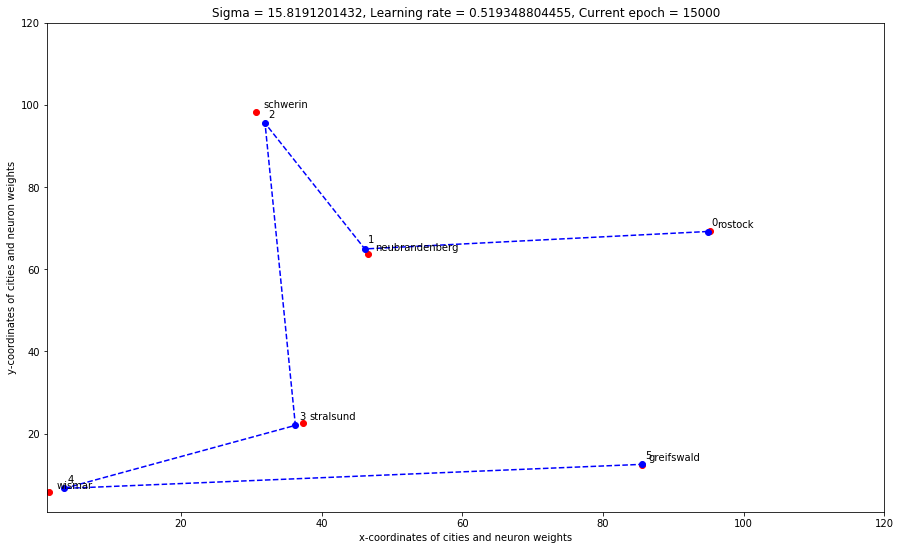

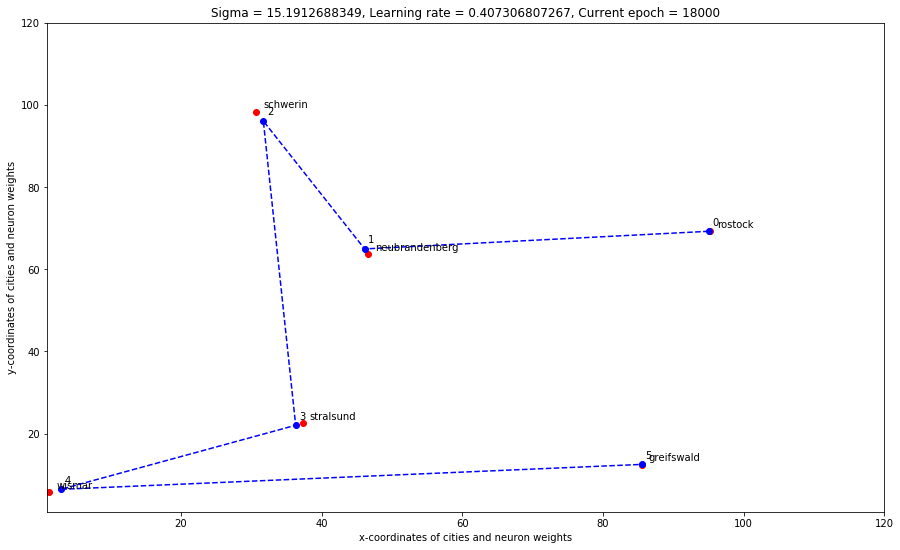

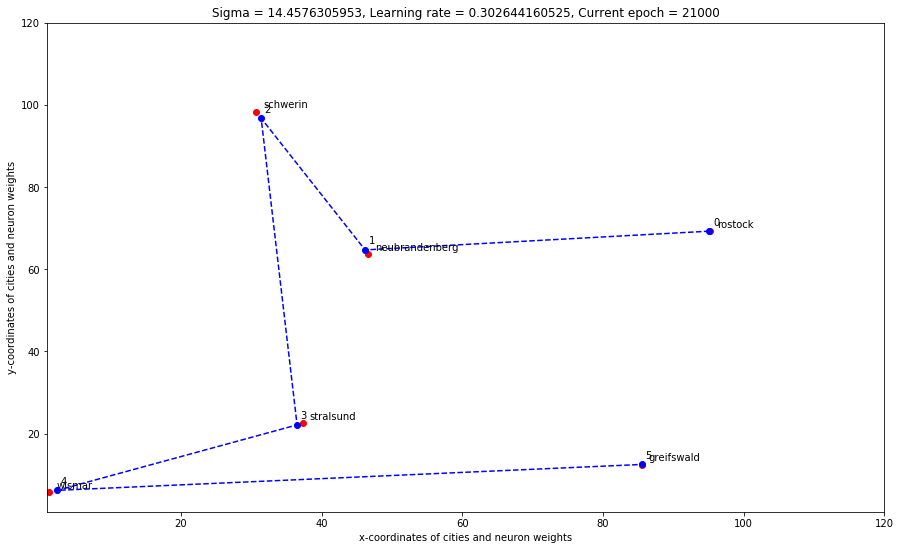

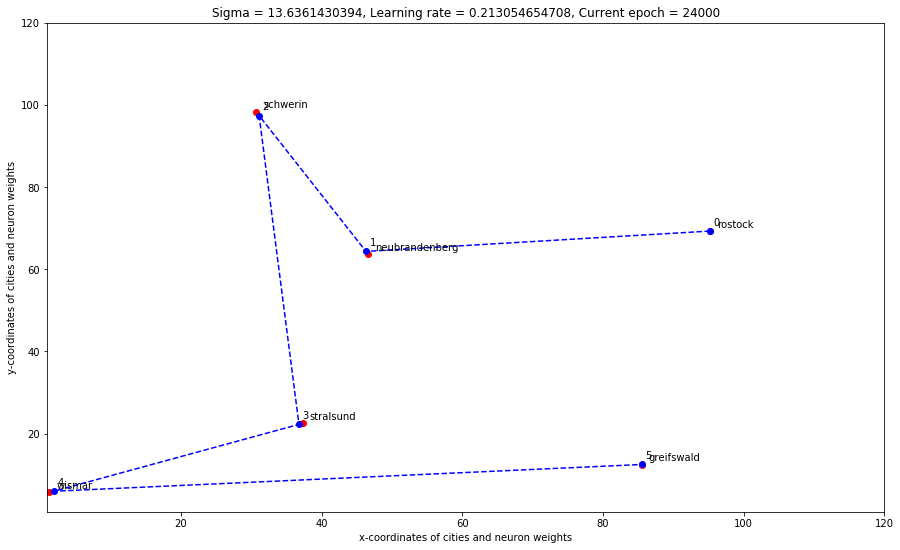

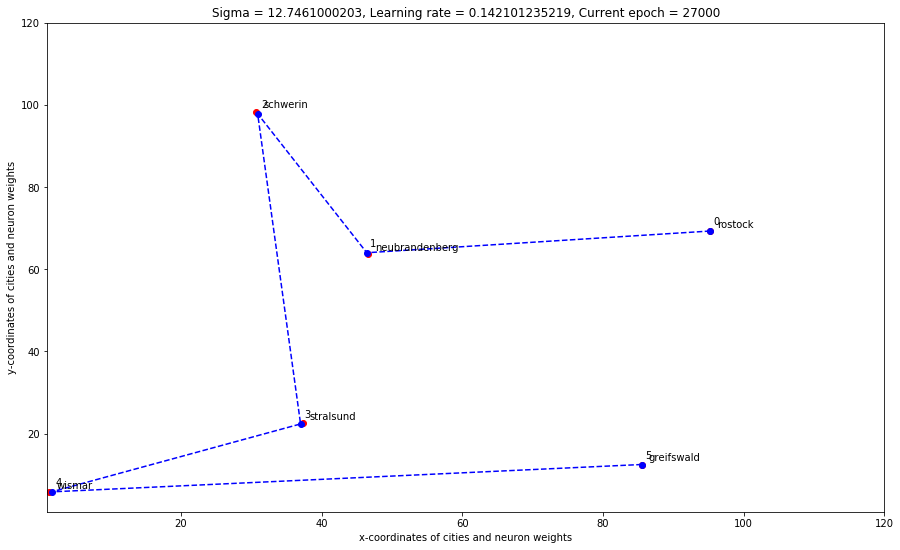

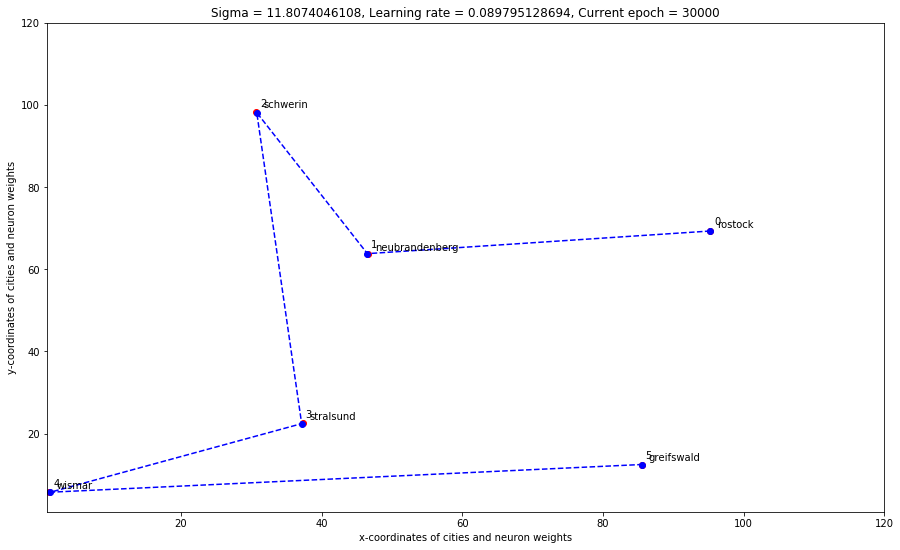

In [14]:
'''
Initialization
'''
no_of_neurons = 6
no_of_cities = 6
lattice_radius = 6
lattice_center = (52, 52)
eta = 0.8
no_of_epochs = 30000

tsm = TravellingSalesMan(no_of_neurons,
                         no_of_cities,
                        lattice_radius,
                        lattice_center,eta,
                        no_of_epochs)

tsm.plot_cities(0)
tsm.train()

# Initial order of cities before training

0.'wismar'

1.'schwerin'

2.'rostock'

3.'stralsund'

4.'greifswald'

5.'neubrandenberg'

# After training

In [15]:
print "Order of cities to visit: ", tsm.sorted_order
print "Order of cities to visit: ", tsm.city_order
print "Total travel distance : ", tsm.total_distance

Order of cities to visit:  [2, 5, 1, 3, 0, 4]
Order of cities to visit:  ['rostock', 'neubrandenberg', 'schwerin', 'stralsund', 'wismar', 'greifswald']
Total travel distance :  345.129019896


# Path using TSP library


In [16]:
#compute path using TSP solve library
distances = tsm.compute_distance_for_TspSolve()
paths = solve_tsp(distances)

travelled_distance =  tsm.calculate_total_path(paths)
print "total travel distance ", travelled_distance
# print "Cties are travelled in ", paths

print "Cities are travelled in order "
for path in paths:
    print " >> " + str(tsm.city_labels[path]),

total travel distance  332.959578276
Cities are travelled in order 
 >> wismar  >> stralsund  >> neubrandenberg  >> schwerin  >> rostock  >> greifswald



# Observations:
    
#### If two cities are in straight line and closer together, neurons stuck in the middle and cannot move towards the cities.

#### If we update only the winning neuron, sometimes observed one or two neurons stays in its initial position.
#### So we are updating the neighborhood neurons of winning neurons using H_ij function, then all neurons started to move towards cities.

#### Paths that we obtained using TSP library are different, as compare to algorithm that we implement. However, total distance is approximately closer.